# Module 1, Week 1

Load .txt data and visualize it!

**Review from Data 8 textbook Chapters 3-5 and 7.**

**Before class reading: Fundamentals of Geophysics Ch 1.2**

**Last week we:**
- Went over the syllabus (ADD LINK).
- Took a whirlwind tour of Earth Sciences and the types of data used in geophysics.
- Saw how to make basic maps with cartopy library. Discussed advantages and disadvantages of different map projections.

**Our goals for today:**
- Plot histograms, cumulative distributions, and global maps.
- Load and visualize global topography.
- Learn about the topography of Earth (hypsometric curve).
- Load and visualize global seafloor age.



## Setup

Run this cell as it is to setup your environment.

In [2]:
import  numpy  as  np
import  matplotlib.pyplot  as plt
import pandas as pd
from matplotlib import cm
from cartopy import config
import cartopy.crs as ccrs

## Reading data in text format

The functions we will use most for reading data in text format are `np.loadtxt`,`pd.read_csv`, and `pd.read_table`. They are similar except `pd.read_csv` has a default comma delimiter and `pd.read_table` has tab ('\t') as its default delimiter.

<img src="Table_6_2.png">

> Source: Python for Data Analysis, McKinney

## Exercise 1, Elevation of Earth's Surface

In class exercise, full credit for attempts, questions are break-out sessions with group.

In [3]:
from IPython.display import YouTubeVideo
# Why Earth Has Two Levels | Hyprometric Curve
# Video credit: MinuteEarth
# Start at 3s, End at 2:25
YouTubeVideo('KOv3FGVmRcA?t=3s')

### Load topography data

First we'll load the files of global topography that we will later analyze. There are three files: an array of latitudes (size 540 x 1), an array of longitudes (size 1081 x 1), and a gridded array of topography (size 540 x 1081).

In [4]:
# Load the elevation/seafloor depth data
lats=np.loadtxt('etopo20lats.txt') 
lons=np.loadtxt('etopo20lons.txt')
topo_grid=np.loadtxt('etopo20data.txt')


Next we'll need to manipulate the data a bit. We need grids of latitude and longitude, so that we can map the topography. And we want a (540 x 1081 = 583740) 583740 element long array to plot the distribution of elevations.

In [5]:
nlats = lats.shape; 
nlons = lons.shape;

latitude =  np.repeat(lats,1081)
lat_grid = latitude.reshape(540,1081)
lon_grid = np.tile(lons,(540,1))

elev = topo_grid.reshape(583740)

### Plot histogram of elevation data

First we plot a simple histogram.

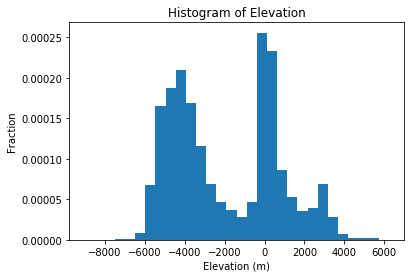

In [6]:
#plt.hist(topo.Elevation,bins=30,normed=True)
plt.hist(elev,bins=30,normed=True)
plt.xlabel('Elevation (m)')
plt.ylabel('Fraction')
plt.title('Histogram of Elevation');

There are two peaks, one near sea-level and one below sea-level (the ocean basins). Earth's crust comes in two flavors: continental and oceanic. And there is something that gives them districtly different elevations.

### Plot Hypsometric Curve

Another useful method of visualizing the distribution of our data is cumulative distribution function (CDF), which for topography has the name "Hypsometric Curve." So the value on the hypsometric curve represents the percentage of Earth's surface with an elevation lower than the elevation at the corresponding value.

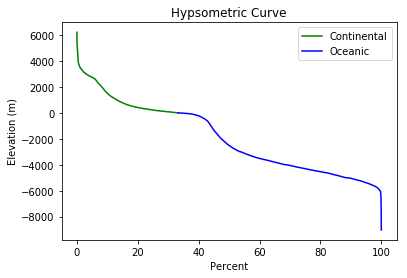

In [7]:
sorted_topo = sorted(elev,reverse=True) # sort the data by decreasing numbers
sorted_topo = np.asarray(sorted_topo)
percent_topo = np.linspace(0,100,len(sorted_topo)) # percentage of Earth's surface that lies below a given elevation.
continental = sorted_topo[sorted_topo > 0]
percent_cont = percent_topo[sorted_topo > 0]
oceanic = sorted_topo[sorted_topo <= 0]
percent_ocean = percent_topo[sorted_topo <= 0]
plt.plot(percent_cont,continental,'g-',label='Continental') #plot
plt.plot(percent_ocean,oceanic,'b-',label= 'Oceanic')
plt.xlabel('Percent')  # labels
plt.ylabel('Elevation (m)')
plt.legend(loc='best')
plt.title('Hypsometric Curve');

### Topograpy Map

Use the grids of latitude and longtitude we made to plot a map of topography.

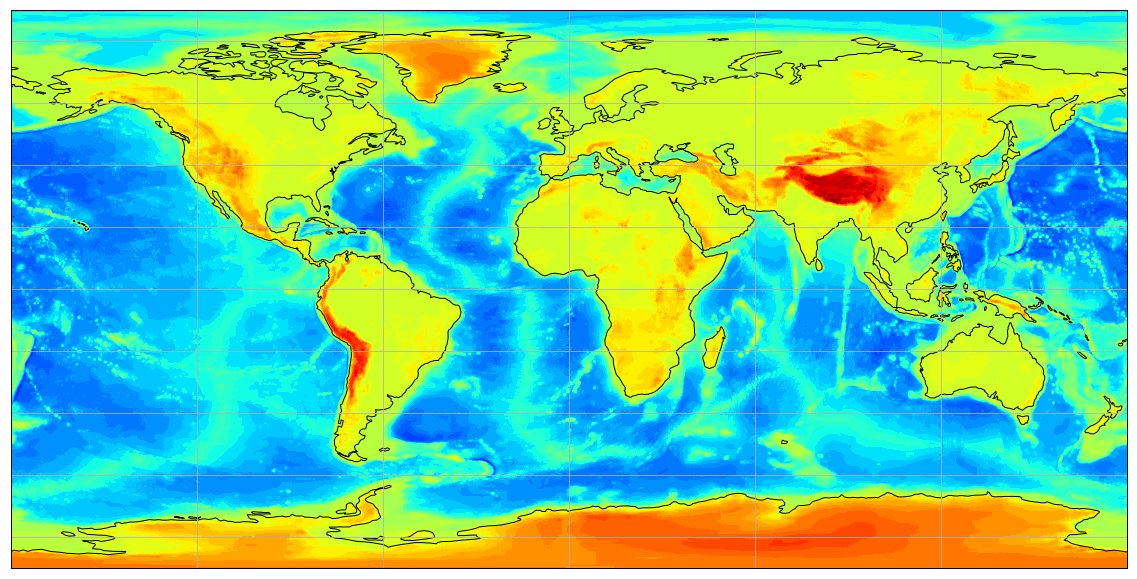

In [8]:
plt.figure(1,(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
map1=plt.contourf(lon_grid, lat_grid, topo_grid,40,cmap=cm.jet,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

plt.show()

Oceans! Continents! Mountains! SEAFLOOR RIDGES! What's up with those?!

Talk about map projections - 3D object represented on 2D map. None are perefect, and different projections are useful for different things, so don't use one projection for all tasks.

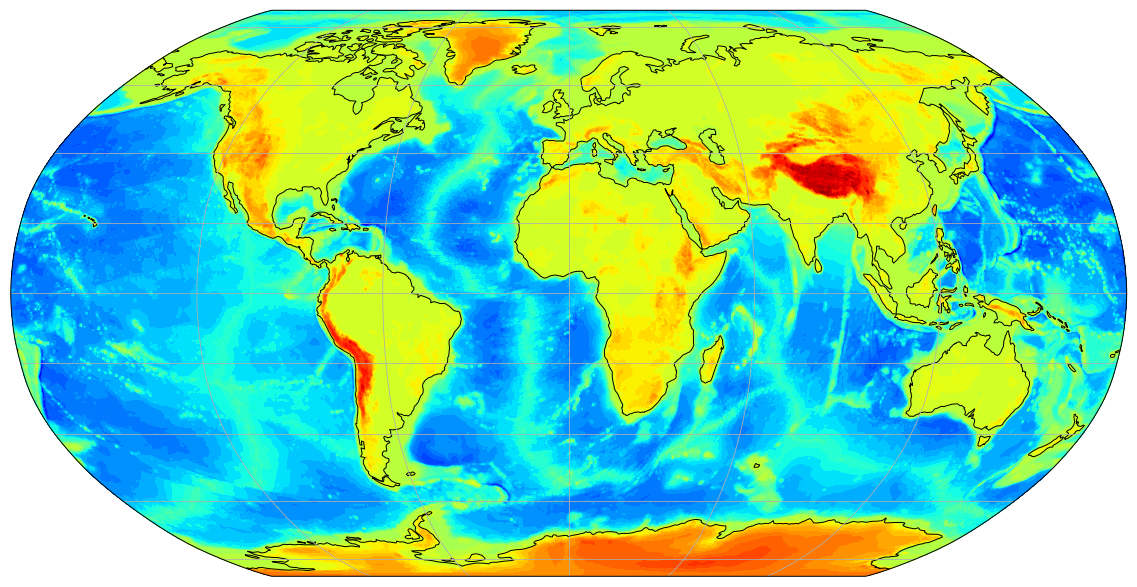

In [9]:
plt.figure(1,(20,20))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
map1=plt.contourf(lon_grid, lat_grid, topo_grid,40,cmap=cm.jet,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


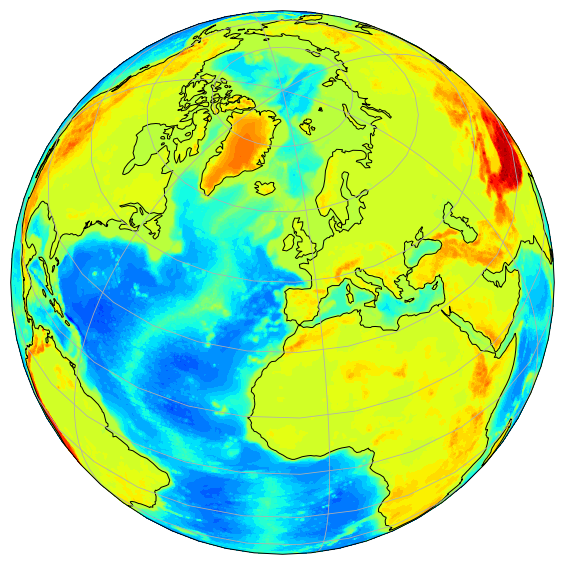

In [10]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.set_global()
map1=plt.contourf(lon_grid, lat_grid, topo_grid,40,cmap=cm.jet,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

plt.show()

## Homework 1, Age of the seafloor

Homework 1, credit for correctness, work on in-class if time allows but due before next meeting

### Load Seafloor Age dataset

Supply this

In [11]:
# Load the seafloor age data
# column 1 is longitude in degree
# column 2 is latitude in degree
# column 3 is bathymetry (seafloor depth) in meters
age_data = pd.read_csv('age_xyz.csv')
age_data.head()



,Longitude,Latitude,Age_Myr
0,-180.0,90.0,55.569202
1,-179.9,90.0,55.568790
2,-179.8,90.0,55.568138
3,-179.7,90.0,55.568073
4,-179.6,90.0,55.568275


### Deal with NaNs 

Supply this

In [12]:
age_longitude = np.asarray(age_data.Longitude)
age_latitude = np.asarray(age_data.Latitude)
age = np.asarray(age_data.Age_Myr)
age_clean_nan = age[~np.isnan(age)]

### Plot histogram

They'll fill the variable they should be plotting (will break if they use age and not age_clean_nan, they can figure that out).

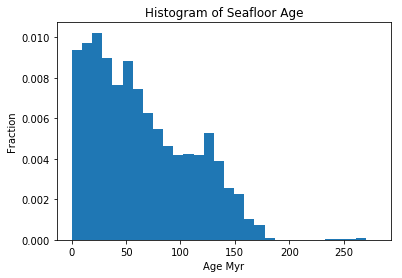

In [13]:
plt.hist(age_clean_nan,bins=30,normed=True)
plt.xlabel('Age Myr')
plt.ylabel('Fraction')
plt.title('Histogram of Seafloor Age');

How old is the oldest seafloor in comparison with the age of Earth? 

### Reshape data into grids for mapping

As before we need to reshape of arrays of data into grids in order to map. Reshape the data into (1801,3601) sized grids.

Break this part! Cut out the .reshape((1801,3601)) part.

In [14]:
age_grid = age.reshape((1801,3601))
age_long_grid = age_longitude.reshape((1801,3601))
age_lat_grid = age_latitude.reshape((1801,3601))

age_lat_grid

array([[ 90. ,  90. ,  90. , ...,  90. ,  90. ,  90. ],
       [ 89.9,  89.9,  89.9, ...,  89.9,  89.9,  89.9],
       [ 89.8,  89.8,  89.8, ...,  89.8,  89.8,  89.8],
       ...,
       [-89.8, -89.8, -89.8, ..., -89.8, -89.8, -89.8],
       [-89.9, -89.9, -89.9, ..., -89.9, -89.9, -89.9],
       [-90. , -90. , -90. , ..., -90. , -90. , -90. ]])

### Seafloor Age Map

Use the grids of latitude and longtitude you just made to plot a map of seafloor age.

Break this part! Cut out the parts of plt.contourf where the variables go.

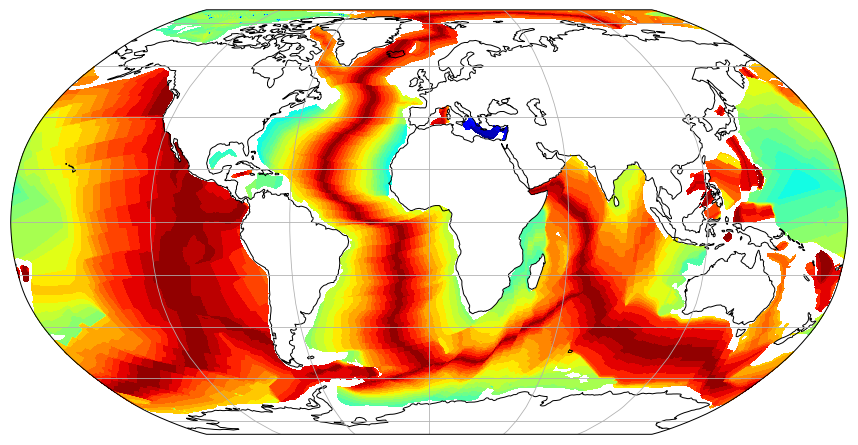

In [15]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
map2 = plt.contourf(age_long_grid, age_lat_grid, age_grid,30,cmap=cm.jet_r,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

plt.show()

What patterns do you observe? Where is the youngest seafloor in relation to the seafloor ridges we observed in our map of topography? Where is the oldest seafloor? Where did the older seafloor go?